<a href="https://colab.research.google.com/github/kimgoinghard/study-machine-learning/blob/main/study_torch_14_digits_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [7]:
print(digits.images[0]) #0이 흰색, 0보다 큰 숫자가 검은색 ,숫자 0의 형태같음.

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [8]:
print(digits.target[0]) #0이었다.

0


In [9]:
print(len(digits.images)) #총 데이터 갯수

1797


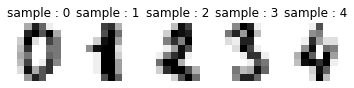

In [25]:
images_and_labels = list(zip(digits.images, digits.target)) #리스트로 짝지어주기
for index, (image, label) in enumerate(images_and_labels[:5]):
  plt.subplot(2,5, index+1) #2x5크기의 subplot생성
  plt.axis('off') #테두리해제
  plt.imshow(image,cmap =plt.cm.gray_r , interpolation = 'nearest') #cmap : 색깔표현, interpolation : 보간법(nearset가 가장 고해상도)
  plt.title('sample : {0}'.format(label))


In [27]:
for i in range(5):
  print(i, '번 인덱스 샘플의 레이블 : ', digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [28]:
print(digits.data[0]) # .data : 8x8 행렬을 64차원 벡터로 변환

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [30]:
X = digits.data #이미지, 64차원
Y = digits.target #각 이미지에 대한 레이블 

In [31]:
import torch
import torch.nn as nn
from torch import optim

In [37]:
model = nn.Sequential( 
    nn.Linear(64,32), #float32형 데이터에 대해 연산을 수행한다!  weight와 bias에 대해서 선형변환을 실시하는 역할
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10) #숫자 10개중에 한 개로 분류하기때문
)
#

In [55]:
X = torch.tensor(X, dtype = torch.float32) #실수형으로 저장
Y = torch.tensor(Y, dtype = torch.int64) #int로 저장

<ipython-input-55-77e342af0039>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype = torch.float32) #실수형으로 저장
<ipython-input-55-77e342af0039>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype = torch.int64) #int로 저장


In [47]:
loss_f = nn.CrossEntropyLoss() # 손실함수 설정

In [41]:
 optimizer = optim.Adam(model.parameters()) #옵티마이저 설정 ADAM (적응형 모멘텀)

In [43]:
losses = [] #손실 그래프를 그리기 위해 비어있는 리스트 선언

In [58]:
for epoch in range(100):
  optimizer.zero_grad() #매 반복마다 0으로 초기화
  y_hat = model(X) #y_hat 계산
  loss = loss_f(y_hat, Y) #loss계산
  loss.backward() #역전파로 gradient 계산하여 매개변수 갱신
  optimizer.step() # 매개변수 업데이트

  if epoch % 10 == 0 :
    print('Epoch : {0}/{1}, Cost : {2:6f}'.format(epoch,100, loss.item()))
  losses.append(loss.item())

Epoch : 0/100, Cost : 0.062084
Epoch : 10/100, Cost : 0.056890
Epoch : 20/100, Cost : 0.052240
Epoch : 30/100, Cost : 0.048064
Epoch : 40/100, Cost : 0.044296
Epoch : 50/100, Cost : 0.040888
Epoch : 60/100, Cost : 0.037758
Epoch : 70/100, Cost : 0.034909
Epoch : 80/100, Cost : 0.032325
Epoch : 90/100, Cost : 0.029982


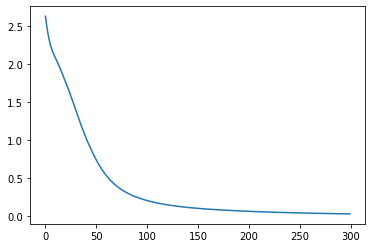

In [59]:
plt.plot(losses)